Import des donnees

In [1]:
import pandas as pd

# charger les données
data = pd.read_csv('Ressources' + '/' + 'Sportifs', sep='\t')

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values

Standardisation des donnees pour les centrer.

In [2]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Decomposition en deux composantes principales

In [3]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [4]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32719055 0.1737131 ]
0.5009036561090068


Representation des athletes selon ces deux dimensions uniquement. Couleur en fonction du classement

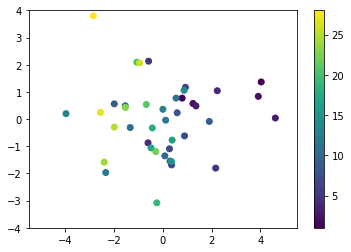

In [5]:
import matplotlib.pyplot as plt

# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.get('Rank'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

On voit que les mieux classes sont plutot a droite et les moins biens classes, plutot a gauche.

Pour comprendre les composantes principales, on utilise pca.components_ qui va montrer la contribution des 10 variables initiales a chacune des PC.

(-0.7, 0.7)

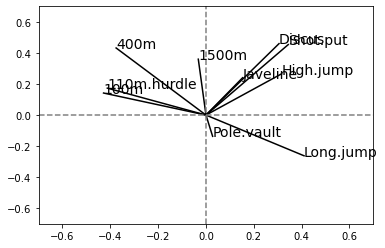

In [8]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

On peut voir que pour la premiere PC (abscisse), les variables a contribution negative correspondent aux disciplines pour lesquelles on a des petites valeurs pour une bonne performance (temps de course) et les contributions positives  pour lesquelles les grandes valeurs sont une bonne performance (distance de lancer). Cette PC permet de separer les athletes qui ont de tres bonnes performanes de ceux qui sont plus mauvais.

La deuxieme permet de separer les athletes plus forts (bons lancers) et moins endurants (basse performance aux 400m et 1500m) des autres. 

On peut aussi voir certaines correlations comme le Discus avec le Shot Put.

## Modules Scikit-Learn ##

Possibilite d'analyse factorielle dans la classe 'Factor Analysis' de 'scikit-learn.decomposition'.

Factorisation de matrice non-negative (utile pour recommandation) dans la classe NMF du module 'scikit-learn.decomposition'.

## Resume ##

ACP maximise la variance de X selon les directions orthogonales.

L'Analyse Factorielle modelise la structure des la covariance des variables observees, pas forcement selon des axes orthogonaux.

La NMF pour des matrics X dont les entrees sont toutes positives. Peut predire les valeurs manquantes de X.